<h1> PNEUMONIA DATA ANALYSIS </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'/Users/briangor/Downloads/Pneumonia-studies.csv')
df

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02708225,The Influence of Medical Clowns on the Perform...,https://clinicaltrials.gov/study/NCT02708225,clowns,UNKNOWN,Medical clowns are known to assist in relaxing...,NO,Asthma|Pneumonia,BEHAVIORAL: medical clown,"length of experium (seconds), length of experi...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,0026-15,2016-03,2016-10,2017-10,2016-03-15,NaN,2016-03-15,NaN,NaN
1,NCT03962725,Avoiding Neuromuscular Blockers to Reduce Comp...,https://clinicaltrials.gov/study/NCT03962725,NaN,TERMINATED,The goal of this study to evaluate whether eli...,NO,Respiratory Failure|Respiratory Infection|Aspi...,DRUG: Neuromuscular Blocking Agents|DRUG: Anes...,Number of participants who either had postoper...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2019P000260,2019-08-07,2022-12-19,2022-12-19,2019-05-24,NaN,2023-02-02,"Massachusetts General Hospital, Boston, Massac...",NaN
2,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
3,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,NCT05380869,POCT PCT in Outpatient LRTI,https://clinicaltrials.gov/study/NCT05380869,POCT-PCT,COMPLETED,Lower respiratory tract infections (LRTI) in p...,NO,Antimicrobial Stewardship|Exacerbation of Alle...,DIAGNOSTIC_TEST: Point-of-care Test,Description of outpatients with lower respirat...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,8736_MPG_23b2019,2020-04-01,2021-03-31,2021-04-30,2022-05-19,NaN,2022-05-19,"Medical School Hannover, Hannover, Lower Saxon...",NaN
9636,NCT05137535,A Study of the Infection and Transmission of S...,https://clinicaltrials.gov/study/NCT05137535,NaN,RECRUITING,"Covid-19 disease, originated by SARS-Cov-2 Cor...",NO,Covid19,OTHER: Questionnaire,"Natural history, Description of the natural hi...",...,Observational Model: |Time Perspective: p,PLS COVID 19 - Prog. 3401CESC,2021-11-03,2021-12-31,2022-06-30,2021-11-30,NaN,2021-11-30,"AULSS 5 Polesana, Rovigo, RO, Italy",NaN
9637,NCT05669235,Differences Between Women With COVID-19 and Lo...,https://clinicaltrials.gov/study/NCT05669235,NaN,RECRUITING,The coronavirus disease of 2019 (COVID-19) has...,NO,COVID-19,DIAGNOSTIC_TEST: Questionnaires,"Fatigue Assessment Scale, Scale that measures ...",...,Observational Model: |Time Perspective: p,OBS_LCOVID,2022-12-29,2023-02-28,2023-06-30,202

In [3]:
df.shape

(9640, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NCT Number                  9640 non-null   object 
 1   Study Title                 9640 non-null   object 
 2   Study URL                   9640 non-null   object 
 3   Acronym                     3645 non-null   object 
 4   Study Status                9640 non-null   object 
 5   Brief Summary               9640 non-null   object 
 6   Study Results               9640 non-null   object 
 7   Conditions                  9640 non-null   object 
 8   Interventions               8226 non-null   object 
 9   Primary Outcome Measures    9452 non-null   object 
 10  Secondary Outcome Measures  7077 non-null   object 
 11  Other Outcome Measures      946 non-null    object 
 12  Sponsor                     9640 non-null   object 
 13  Collaborators               3451 

In [5]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

<h2> Temporal Trends in Pneumonia Studies </h2>

1983.0       1
1984.0       1
1994.0       3
1995.0       1
1997.0       4
1998.0       7
1999.0       5
2000.0       9
2001.0      15
2002.0      27
2003.0      41
2004.0      48
2005.0      59
2006.0      56
2007.0      64
2008.0      80
2009.0      76
2010.0      96
2011.0      78
2012.0      96
2013.0      97
2014.0     121
2015.0     128
2016.0     137
2017.0     129
2018.0     142
2019.0     192
2020.0    3823
2021.0    2230
2022.0    1143
2023.0     607
2024.0      16
2025.0       1
Name: Start Date, dtype: int64


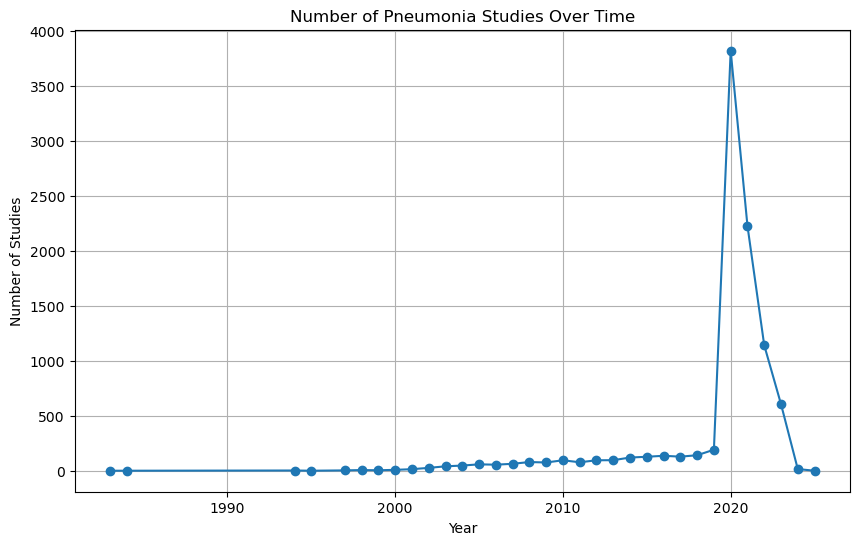

In [11]:
# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract year from 'Start Date' and count studies per year
studies_per_year = df['Start Date'].dt.year.value_counts().sort_index()
print(studies_per_year)

# Plot the number of studies over time

plt.figure(figsize=(10, 6))
plt.plot(studies_per_year.index, studies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Pneumonia Studies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()

The distribution of Pneumonia studies by start year indicates the following trends:

- The number of studies gradually increased over the years, with a **noticeable jump starting in 2020**.
- 2020 had a significant increase in the number of studies, indicating a potential focus on Pneumonia in response to global events (e.g., COVID-19 pandemic).
- The years 2020 and 2021 saw the highest number of Pneumonia studies, with 2020 having the most significant increase.

<h2> Distribution of Pneumonia Studies Phases </h2>

PHASE2           1143
PHASE3            899
PHASE4            431
PHASE1            399
PHASE2|PHASE3     322
PHASE1|PHASE2     298
EARLY_PHASE1       77
Name: Phases, dtype: int64


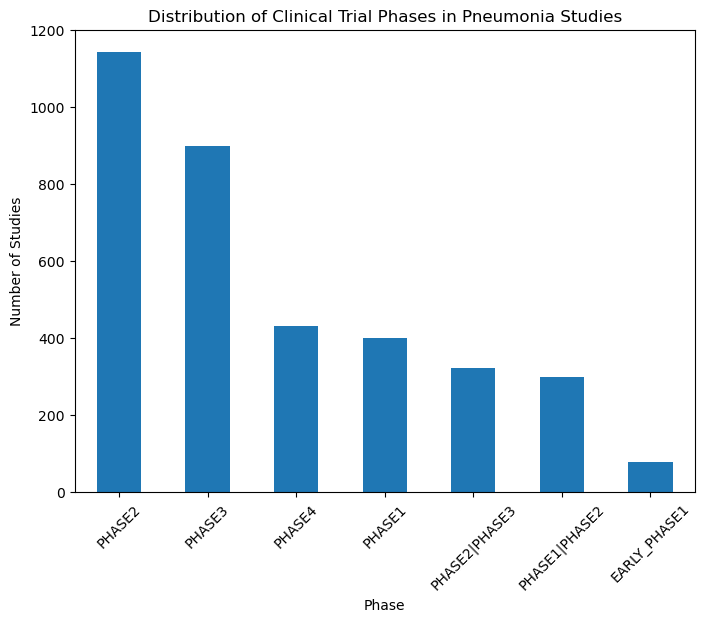

In [9]:
# Count the number of studies in each phase
phase_distribution = df['Phases'].value_counts()
print(phase_distribution)

# Plot a bar chart for phase distribution
plt.figure(figsize=(8, 6))
phase_distribution.plot(kind='bar')
plt.title('Distribution of Clinical Trial Phases in Pneumonia Studies')
plt.xlabel('Phase')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()

PHASE2: There are **1,143 studies in Phase 2**. Phase 2 studies typically focus on assessing the effectiveness and safety of treatments in a larger group of patients, building on the findings of Phase 1 trials.

PHASE3: There are **899 studies in Phase 3**. Phase 3 trials are critical for evaluating the efficacy and safety of potential treatments on a larger scale and are a pivotal step before seeking regulatory approval.

PHASE4: There are **431 studies in Phase 4**. Phase 4 studies are often post-marketing surveillance studies that monitor the long-term safety and effectiveness of a treatment after it has been approved for use.

PHASE1: There are **399 studies in Phase 1**. Phase 1 trials are the earliest phase and primarily focus on the safety and dosage of a new treatment in a small group of participants.

PHASE2|PHASE3: There are **322 studies that appear to combine both Phase 2 and Phase 3** elements, indicating a transitional phase with a focus on both efficacy and expanded safety evaluation.

PHASE1|PHASE2: There are **298 studies combining Phase 1 and Phase 2** characteristics, which may involve assessing safety and initial efficacy in a broader population.

EARLY_PHASE1: There are **77 studies designated as "EARLY_PHASE1,"** which might represent very early exploratory studies focusing on initial safety assessments in a small number of participants.

### Interpretation
This distribution suggests that Pneumonia studies span various phases, reflecting a comprehensive approach to understanding and addressing Pneumonia-related issues. Phase 2 and Phase 3 studies are particularly prominent, emphasizing the importance of evaluating treatment effectiveness and safety in larger patient populations. If you have more specific questions or need further analysis, please let me know.

<h2> Top 10 Pneumonia Conditions </h2>

COVID-19                  2521
Covid19                   1898
Pneumonia                  673
Covid-19                   222
SARS-CoV-2 Infection       218
COVID-19 Pneumonia         203
Corona Virus Infection     164
SARS-CoV-2                 153
COVID-19 Pandemic          146
COVID                      141
Name: Conditions, dtype: int64


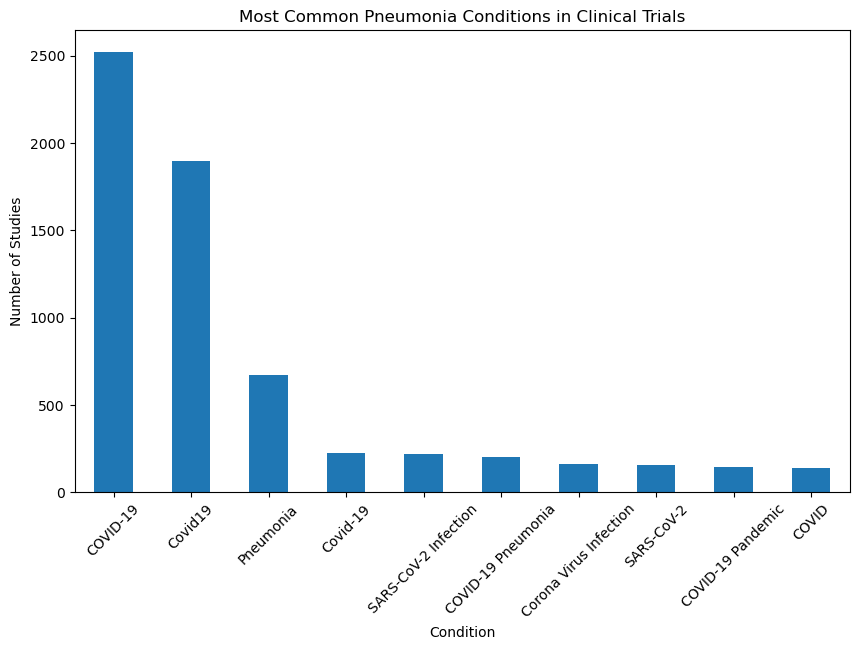

In [10]:
# Count the occurrences of each HIV condition
common_conditions = df['Conditions'].str.split('|').explode().str.strip().value_counts().head(10)
print(common_conditions)

# Plot a bar chart for common HIV conditions
plt.figure(figsize=(10, 6))
common_conditions.plot(kind='bar')
plt.title('Most Common Pneumonia Conditions in Clinical Trials')
plt.xlabel('Condition')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()

1. **COVID-19**: There are 2,521 studies related to COVID-19, indicating a significant focus on understanding and managing the COVID-19 pandemic within the context of pneumonia.

2. **Covid19**: There are 1,898 studies related to "Covid19," which is a common variant term for COVID-19.

3. **Pneumonia**: There are 673 studies explicitly related to pneumonia, indicating a focus on understanding and treating pneumonia as a medical condition.

4. **Covid-19**: There are 222 studies with the label "Covid-19." This might represent another variant in naming COVID-19 studies.

5. **SARS-CoV-2 Infection**: There are 218 studies focused on understanding infections caused by the SARS-CoV-2 virus, which is the virus responsible for COVID-19.

6. **COVID-19 Pneumonia**: There are 203 studies that specifically address pneumonia associated with COVID-19.

7. **Corona Virus Infection**: There are 164 studies related to infections caused by coronaviruses. This term may encompass various types of coronaviruses.

8. **SARS-CoV-2**: There are 153 studies focusing on the SARS-CoV-2 virus, similar to study #5, indicating a specific focus on the virus itself.

9. **COVID-19 Pandemic**: There are 146 studies related to the broader concept of the COVID-19 pandemic, exploring its impact and management.

10. **COVID**: There are 141 studies related to "COVID," which might represent another variant term for COVID-19 studies.

### Interpretation
These results highlight the prevalence of COVID-19 and pneumonia studies in the dataset, which is expected given the global significance of these health issues. Researchers are actively investigating various aspects of COVID-19, including its association with pneumonia and other conditions. If you need further analysis or have specific questions, please let me know.

<h2> Study Types and Designs </h2>

INTERVENTIONAL     5773
OBSERVATIONAL      3833
EXPANDED_ACCESS      34
Name: Study Type, dtype: int64


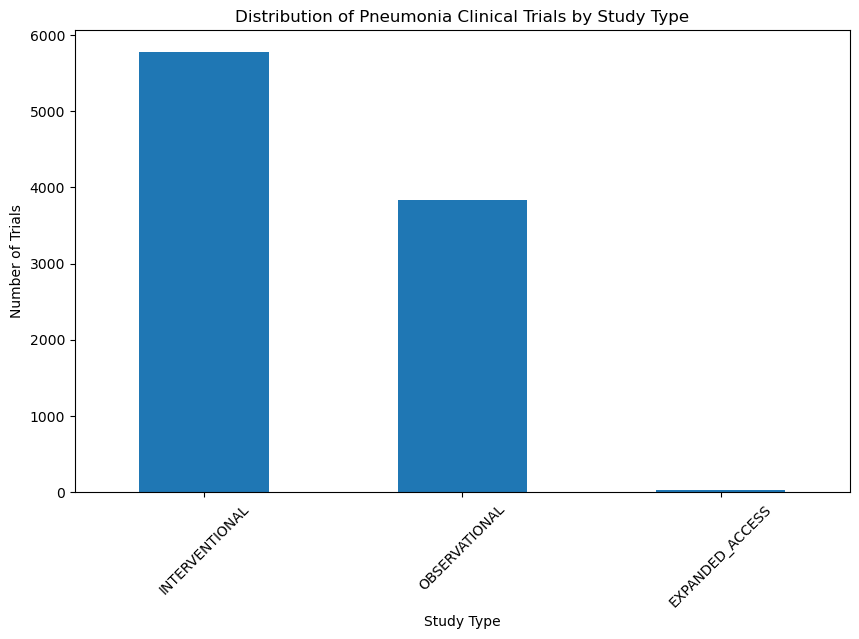

In [12]:
# Count the number of trials by study type
study_type_counts = df['Study Type'].value_counts()
print(study_type_counts)

# Plot a bar chart for study type distribution
plt.figure(figsize=(10, 6))
study_type_counts.plot(kind='bar')
plt.title('Distribution of Pneumonia Clinical Trials by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

**INTERVENTIONAL**: There are 5,773 studies categorized as interventional. These studies likely involve clinical trials, experiments, or interventions to test specific treatments, drugs, or medical procedures for pneumonia and related conditions.

**OBSERVATIONAL**: There are 3,833 studies categorized as observational. Observational studies typically involve the collection and analysis of data without direct intervention. These studies aim to understand patterns, risk factors, and outcomes associated with pneumonia and related diseases through observation.

**EXPANDED_ACCESS**: There are 34 studies categorized as expanded access. Expanded access programs may allow patients to access investigational treatments outside of clinical trials. This suggests that some studies focus on providing access to new treatments for pneumonia.

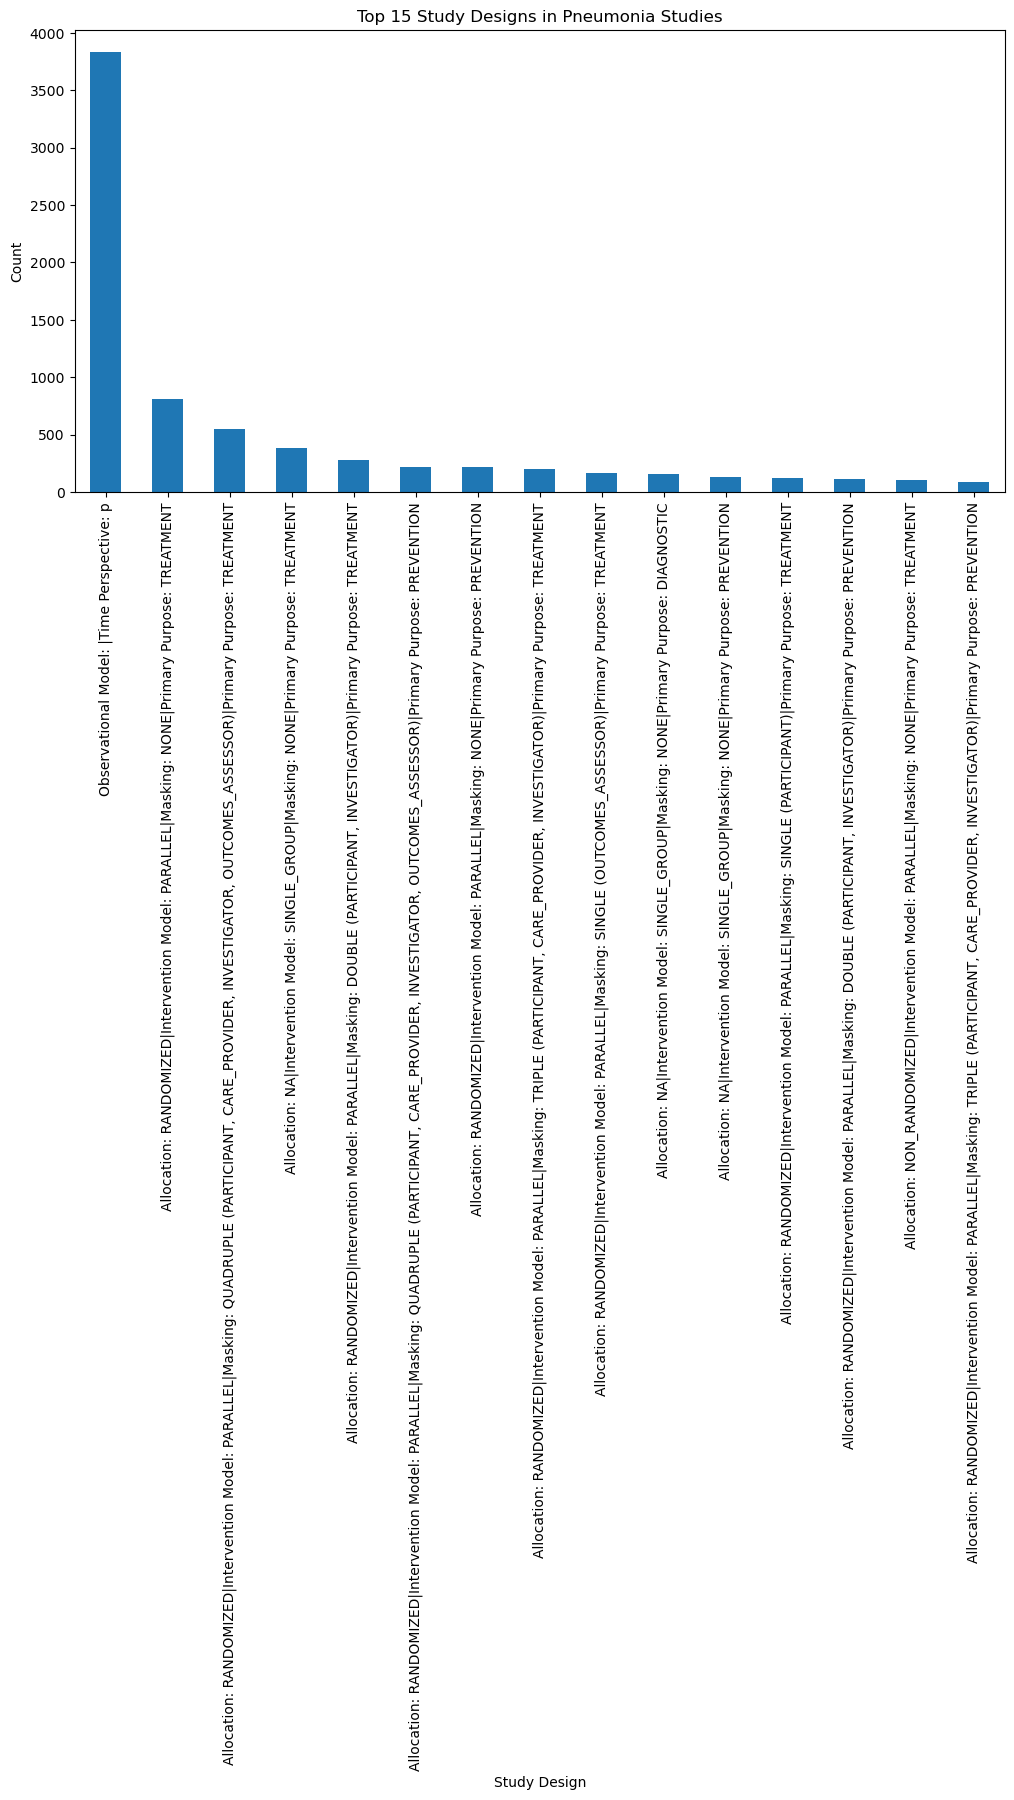

In [14]:
# Study Design Analysis
study_design_counts = df['Study Design'].value_counts()

plt.figure(figsize=(12, 6))
study_design_counts[:15].plot(kind='bar')
plt.title('Top 15 Study Designs in Pneumonia Studies')
plt.xlabel('Study Design')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<h2> Distribution of Funding Types </h2>

OTHER        7072
INDUSTRY     1795
OTHER_GOV     453
NIH           163
NETWORK        96
FED            47
INDIV           7
UNKNOWN         7
Name: Funder Type, dtype: int64


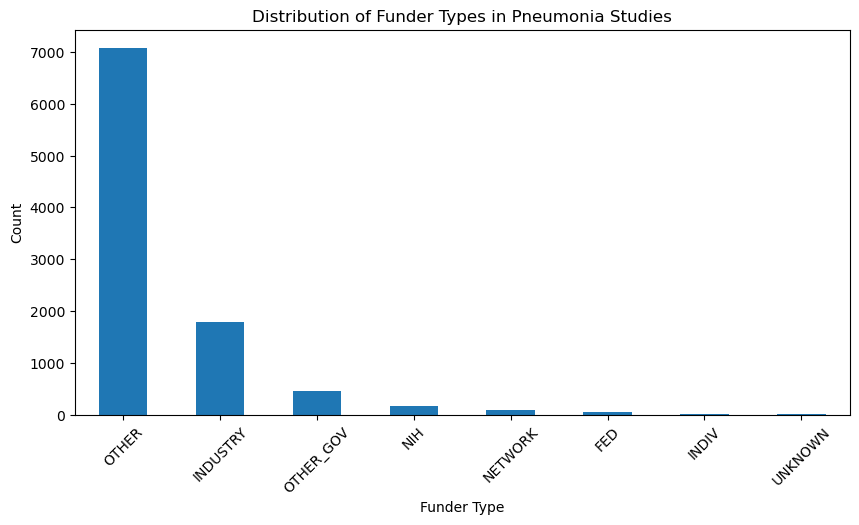

In [15]:
# Analyze the distribution of funder types
funder_type_counts = df['Funder Type'].value_counts()
print(funder_type_counts)

plt.figure(figsize=(10, 5))
funder_type_counts.plot(kind='bar')
plt.title('Distribution of Funder Types in Pneumonia Studies')
plt.xlabel('Funder Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

OTHER: There are 7,072 studies funded by various sources classified as "OTHER." These sources might include non-profit organizations, foundations, or non-governmental entities.

INDUSTRY: There are 1,795 studies funded by the industry. This typically includes pharmaceutical companies or private-sector organizations.

OTHER_GOV: There are 453 studies funded by other government agencies.

NIH: There are 163 studies funded by the National Institutes of Health (NIH), which is a major research agency in the United States.

NETWORK: There are 96 studies with funding from a network of organizations or institutions.

FED: There are 47 studies funded by the federal government.

INDIV: There are 7 studies funded by individual sources.

UNKNOWN: There are 7 studies with unspecified or unknown funding sources.

<h2> Distribution of Age Groups </h2>

ADULT, OLDER_ADULT           6943
CHILD, ADULT, OLDER_ADULT    1324
ADULT                         590
CHILD                         427
CHILD, ADULT                  232
OLDER_ADULT                   124
Name: Age, dtype: int64


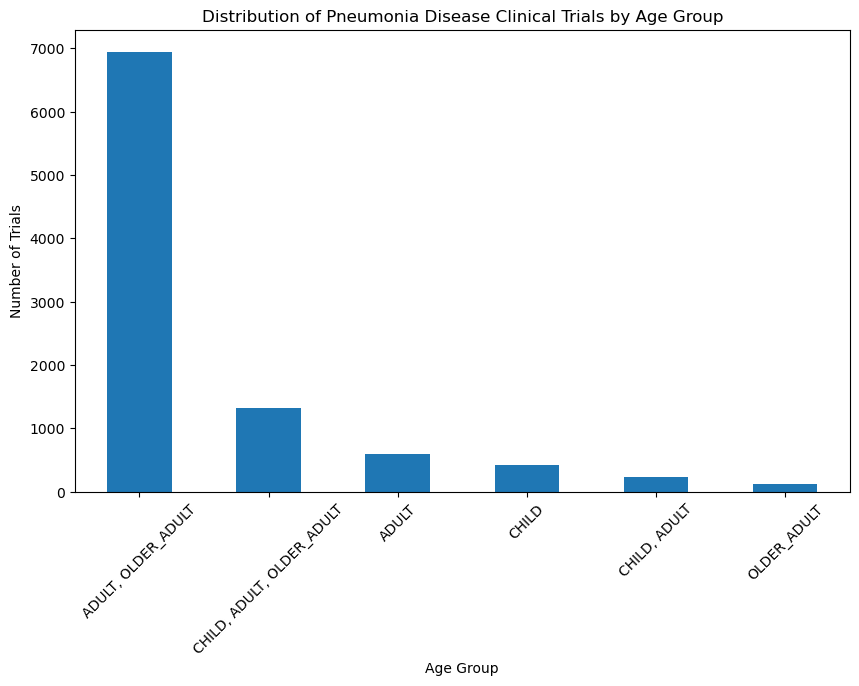

In [16]:
# Count the number of trials by age group
age_group_counts = df['Age'].value_counts()
print(age_group_counts)

# Plot a bar chart for age group distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribution of Pneumonia Disease Clinical Trials by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

DULT, OLDER_ADULT: There are 6,943 studies that include participants from both the adult and older adult age groups.

CHILD, ADULT, OLDER_ADULT: There are 1,324 studies that involve participants from all three age groups: child, adult, and older adult.

ADULT: There are 590 studies that exclusively involve adult participants.

CHILD: There are 427 studies that exclusively involve child participants.

CHILD, ADULT: There are 232 studies that include both child and adult participants.

OLDER_ADULT: There are 124 studies that exclusively involve older adult participants.

This distribution reflects the diverse age groups covered in pneumonia-related studies, from children to older adults. Researchers are conducting studies involving different age categories to better understand and address the complexities of pneumonia in various populations

<h2> Collaborators Analysis </h2>

In [17]:
# Collaborators Analysis of the top 10
# Count the number of studies involving each collaborator
collaborators=df['Collaborators'].str.split('|').explode().str.strip().value_counts().head(10)
print(collaborators)

National Cancer Institute (NCI)                                  62
Pfizer                                                           59
National Institutes of Health (NIH)                              38
National Institute of Allergy and Infectious Diseases (NIAID)    37
Canadian Institutes of Health Research (CIHR)                    37
National Heart, Lung, and Blood Institute (NHLBI)                35
Centers for Disease Control and Prevention                       30
GlaxoSmithKline                                                  27
Bill and Melinda Gates Foundation                                25
AstraZeneca                                                      23
Name: Collaborators, dtype: int64


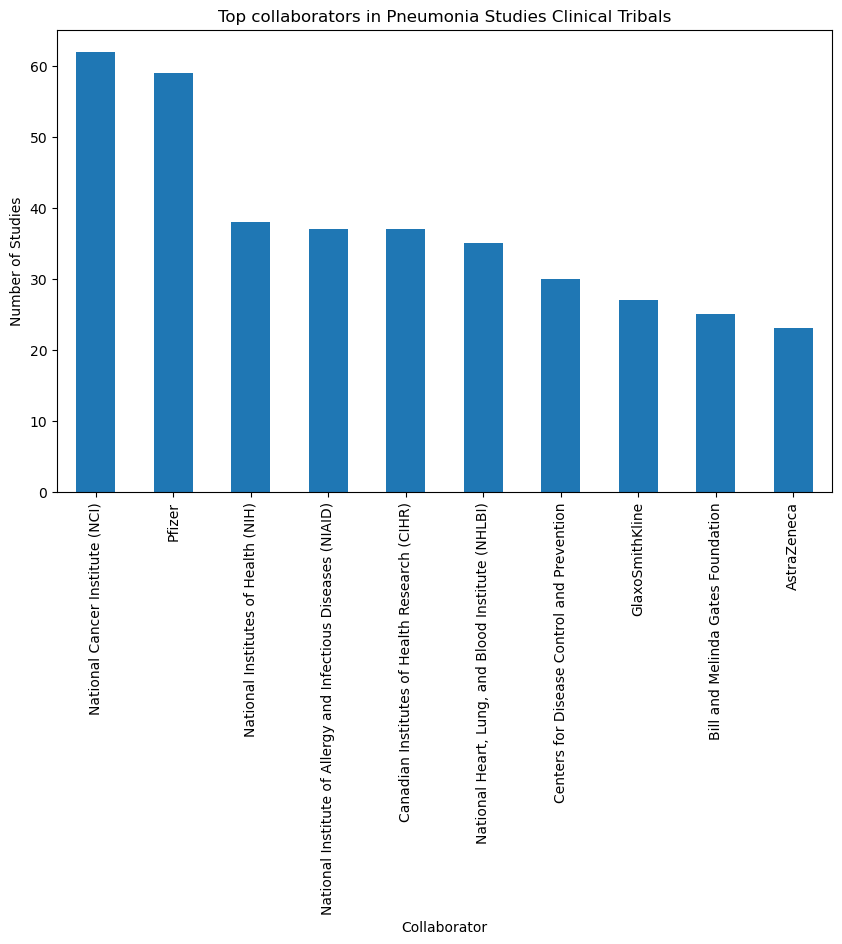

In [19]:
# Plot a bar chart for top collaborators
plt.figure(figsize=(10,6))
collaborators.plot(kind='bar')
plt.title('Top collaborators in Pneumonia Studies Clinical Tribals')
plt.xlabel('Collaborator')
plt.ylabel('Number of Studies')
plt.show()

National Cancer Institute (NCI): NCI's involvement in 62 studies suggests their interest in exploring the connections between pneumonia and cancer, as well as studying pneumonia-related complications and treatments in cancer patients.

Pfizer: Pfizer is actively participating in 59 studies, indicating a strong commitment to developing pharmaceutical solutions for pneumonia management and prevention.

National Institutes of Health (NIH): NIH's participation in 38 studies underscores their dedication to funding and conducting research on pneumonia, likely with a focus on public health and biomedical research.

National Institute of Allergy and Infectious Diseases (NIAID): NIAID's involvement in 37 studies suggests a focus on infectious aspects of pneumonia, such as viral or bacterial causes and vaccine development.

Canadian Institutes of Health Research (CIHR): CIHR's collaboration in 37 studies highlights their role in supporting research on pneumonia, particularly in a Canadian context.

National Heart, Lung, and Blood Institute (NHLBI): NHLBI's participation in 35 studies indicates a focus on pneumonia's impact on the cardiovascular and respiratory systems and its connections to heart and lung diseases.

Centers for Disease Control and Prevention: CDC's participation in 30 studies suggests a focus on epidemiology, public health interventions, and disease surveillance related to pneumonia.

GlaxoSmithKline: GlaxoSmithKline's involvement in 27 studies reflects their commitment to developing pharmaceutical interventions and vaccines for pneumonia prevention and treatment.

Bill and Melinda Gates Foundation: The Gates Foundation's collaboration in 25 studies likely signifies their interest in global health and initiatives to reduce pneumonia-related morbidity and mortality, especially in developing countries.

AstraZeneca: AstraZeneca's participation in 23 studies indicates their active role in developing and researching pneumonia-related drugs, therapies, or vaccines.

Overall, these collaborators represent a diverse set of organizations and institutions, each contributing their expertise and resources to advance our understanding of pneumonia and improve patient care, prevention, and treatment. Collaborative efforts across these entities are critical for addressing the multifaceted challenges associated with pneumonia.

<h2> Intervention Types </h2>

In [20]:
# Count the occurrence of each intervention type
intervention_types=df['Interventions'].str.split('|').explode().str.strip().value_counts().head(10)
print(intervention_types)

DRUG: Placebo               580
OTHER: Placebo              241
BIOLOGICAL: Placebo          95
DRUG: Hydroxychloroquine     90
OTHER: No intervention       61
DRUG: Azithromycin           58
DRUG: Remdesivir             53
DRUG: Tocilizumab            42
DRUG: Favipiravir            37
DRUG: Ivermectin             36
Name: Interventions, dtype: int64


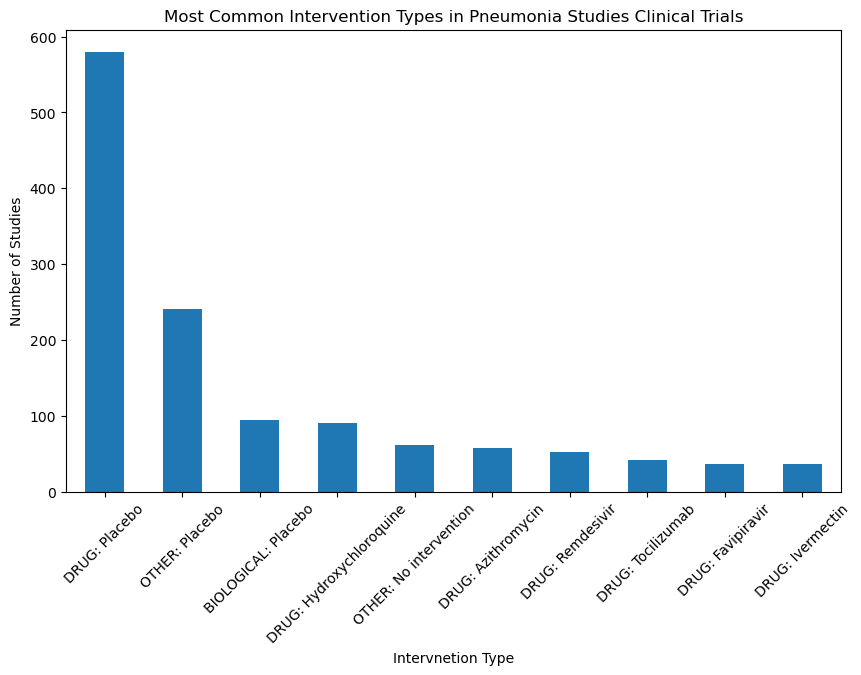

In [22]:
# Plot a bar chart for intervention types
plt.figure(figsize=(10,6))
intervention_types.plot(kind='bar')
plt.title('Most Common Intervention Types in Pneumonia Studies Clinical Trials')
plt.xlabel('Intervnetion Type')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()

**DRUG: Placebo (580 studies)**: Placebo-controlled studies involve using an inactive substance (placebo) to assess the effectiveness of new drugs or treatments for pneumonia. These studies help determine whether the new intervention offers significant benefits over a placebo.

**OTHER: Placebo (241 studies)**: This likely represents studies where a non-standard or specific type of placebo is being used in clinical trials for pneumonia research. These placebos may have variations from the standard placebo.

**BIOLOGICAL: Placebo (95 studies)**: Biological placebos are placebos made from biologically inactive substances, such as saline, to mimic the administration of a biological treatment. The use of biological placebos can help assess the effectiveness of biologic interventions.

**DRUG: Hydroxychloroquine (90 studies)**: Hydroxychloroquine has been studied in the context of pneumonia treatment, especially during the COVID-19 pandemic. These studies investigate its potential effectiveness in managing pneumonia symptoms.

**OTHER: No intervention (61 studies)**: In these studies, patients with pneumonia may receive no specific treatment or intervention. Researchers might be interested in understanding the natural course of the disease in the absence of medical intervention.

**DRUG: Azithromycin (58 studies)**: Azithromycin is an antibiotic that has been investigated for its potential role in treating pneumonia, especially when the cause is bacterial. Studies involving azithromycin aim to assess its effectiveness.

**DRUG: Remdesivir (53 studies)**: Remdesivir was initially studied for its antiviral properties in pneumonia, particularly for viral pneumonia cases. These studies examine its potential to reduce the severity and duration of the illness.

**DRUG: Tocilizumab (42 studies)**: Tocilizumab is an immunosuppressive drug used to manage severe inflammation. Studies involving tocilizumab aim to determine its efficacy in mitigating the inflammatory response often associated with pneumonia.

**DRUG: Favipiravir (37 studies)**: Favipiravir is an antiviral medication that has been studied in the context of viral pneumonia, including pneumonia caused by emerging infectious diseases. These studies assess its antiviral properties.

**DRUG: Ivermectin (36 studies)**: Ivermectin has been investigated for its potential antiviral and anti-inflammatory properties in the context of pneumonia, particularly during the COVID-19 pandemic.

### Interpretation
These results reflect the diversity of interventions and treatments being explored in pneumonia-related research, including both pharmaceutical drugs and control conditions like placebos or no intervention. The aim is to improve our understanding of effective interventions for managing pneumonia and to develop evidence-based treatment strategies.

<h2> Sponsorship Analysis </h2>

In [23]:
# Count the number of studies sponsored by each entity type
sponsorship_distribution=df['Sponsor'].value_counts().head(10)
print(sponsorship_distribution)

Assistance Publique - Hôpitaux de Paris                          142
Assiut University                                                117
National Institute of Allergy and Infectious Diseases (NIAID)     98
Pfizer                                                            79
Cairo University                                                  58
University Hospital, Strasbourg, France                           51
Duke University                                                   45
Hospices Civils de Lyon                                           42
University Hospital, Montpellier                                  42
Ain Shams University                                              41
Name: Sponsor, dtype: int64


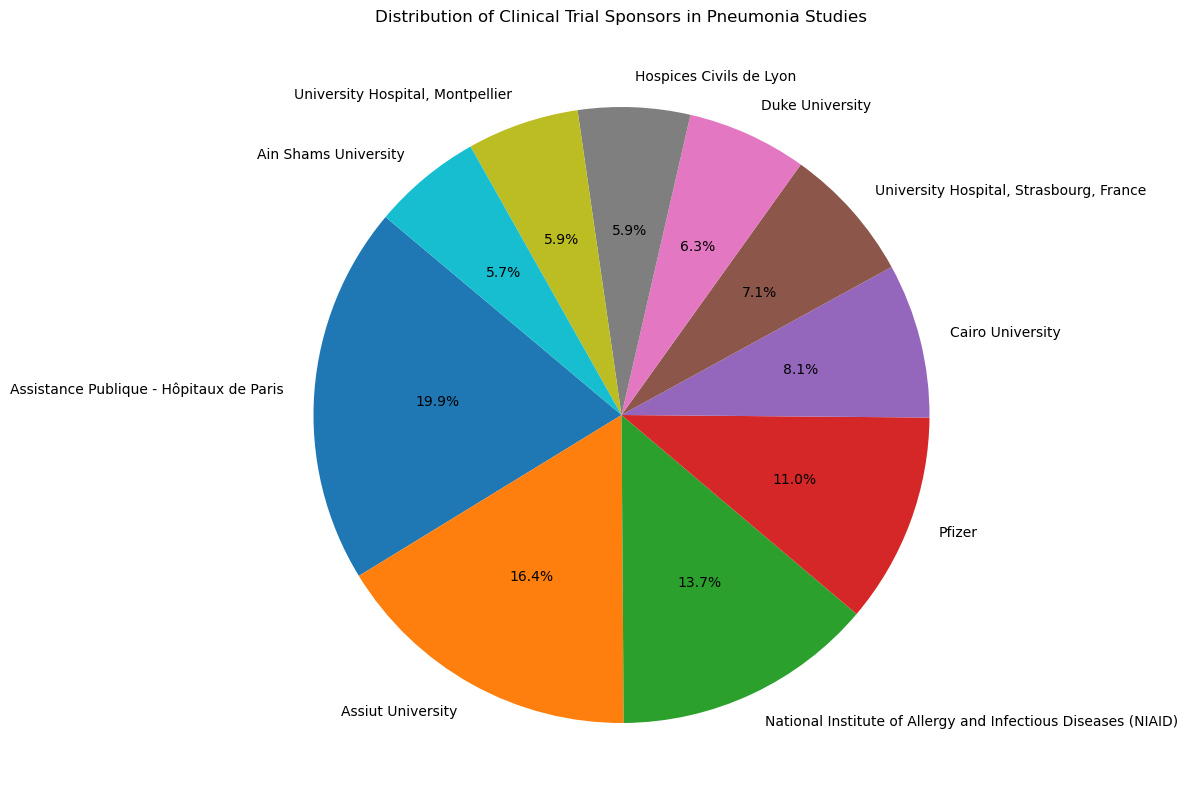

In [24]:
# Plotting a pie chart for sponshorship distribution
plt.figure(figsize=(15,10))
plt.pie(sponsorship_distribution, labels=sponsorship_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Clinical Trial Sponsors in Pneumonia Studies')
plt.show()

**Assistance Publique - Hôpitaux de Paris (142 studies)**: This sponsor is associated with hospitals in Paris, France, and is actively supporting research related to pneumonia. The organization likely plays a significant role in funding and facilitating pneumonia studies.

**Assiut University (117 studies)**: Assiut University, located in Assiut, Egypt, is actively involved in sponsoring pneumonia research. It is contributing to the advancement of knowledge in this field.

**National Institute of Allergy and Infectious Diseases (NIAID) (98 studies)**: NIAID, a part of the National Institutes of Health (NIH) in the United States, is known for its role in supporting research related to infectious diseases, including pneumonia.

**Pfizer (79 studies)**: Pfizer, a global pharmaceutical company, is actively involved in funding and sponsoring pneumonia-related research. This involvement may include clinical trials for pneumonia treatments and interventions.

**Cairo University (58 studies)**: Cairo University in Egypt is actively supporting and sponsoring pneumonia research. It likely plays a significant role in advancing knowledge in the field within the Egyptian context.

**University Hospital, Strasbourg, France (51 studies)**: This university hospital in Strasbourg, France, is a key sponsor of pneumonia research. It contributes to both clinical and academic aspects of pneumonia studies.

**Duke University (45 studies)**: Duke University in the United States is involved in sponsoring research related to pneumonia. This institution likely conducts research and clinical trials in this area.

**Hospices Civils de Lyon (42 studies)**: Hospices Civils de Lyon, a group of public hospitals in Lyon, France, is actively supporting and sponsoring pneumonia studies.

**University Hospital, Montpellier (42 studies)**: The university hospital in Montpellier, France, is playing a significant role in funding pneumonia research, likely contributing to the academic and clinical understanding of pneumonia.

**Ain Shams University (41 studies)**: Ain Shams University, located in Cairo, Egypt, is actively involved in sponsoring pneumonia research. It is advancing research in the field within the Egyptian context.

These results highlight the international collaboration and support from various institutions and organizations in advancing pneumonia research. They represent a diverse group of sponsors with a shared interest in improving our understanding and treatment of pneumonia, which is crucial for public health.

<h2> Gender Distribution </h2>

ALL       9384
FEMALE     189
MALE        52
Name: Sex, dtype: int64


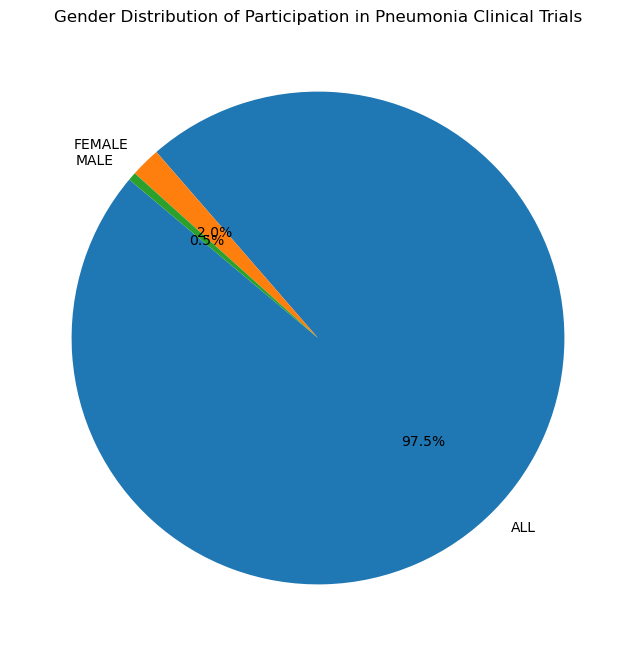

In [25]:
# Count the number of studiies with male and female participants
gender_distribution=df['Sex'].value_counts()
print(gender_distribution)

# Plot a pie chart for gender distribution
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Participation in Pneumonia Clinical Trials')
plt.show()

**ALL (9,384 participants)**: The majority of participants in these pneumonia studies are categorized as "ALL," which likely includes individuals of all genders or a combined gender category. This suggests that most studies include participants of diverse gender identities, and the focus is on the broader population.

**FEMALE (189 participants)**: A smaller proportion of participants, 189 in total, are specifically categorized as "FEMALE." This indicates that there is a subset of studies within the dataset that focus on female participants. These studies may be designed to address gender-specific aspects of pneumonia, or they may include conditions or treatments that are more relevant to females.

**MALE (52 participants)**: An even smaller number of participants, 52 in total, are categorized as "MALE." Similar to the "FEMALE" category, this suggests that there are specific studies within the dataset that concentrate on male participants. These studies may aim to address gender-specific factors related to pneumonia or focus on interventions relevant to males.

The "ALL" category is predominant, indicating that most pneumonia studies aim to include participants from diverse gender groups. However, the presence of "FEMALE" and "MALE" categories suggests that there are studies tailored to understanding gender-specific aspects of pneumonia and related conditions.

<h2> Outcome Measures </h2>

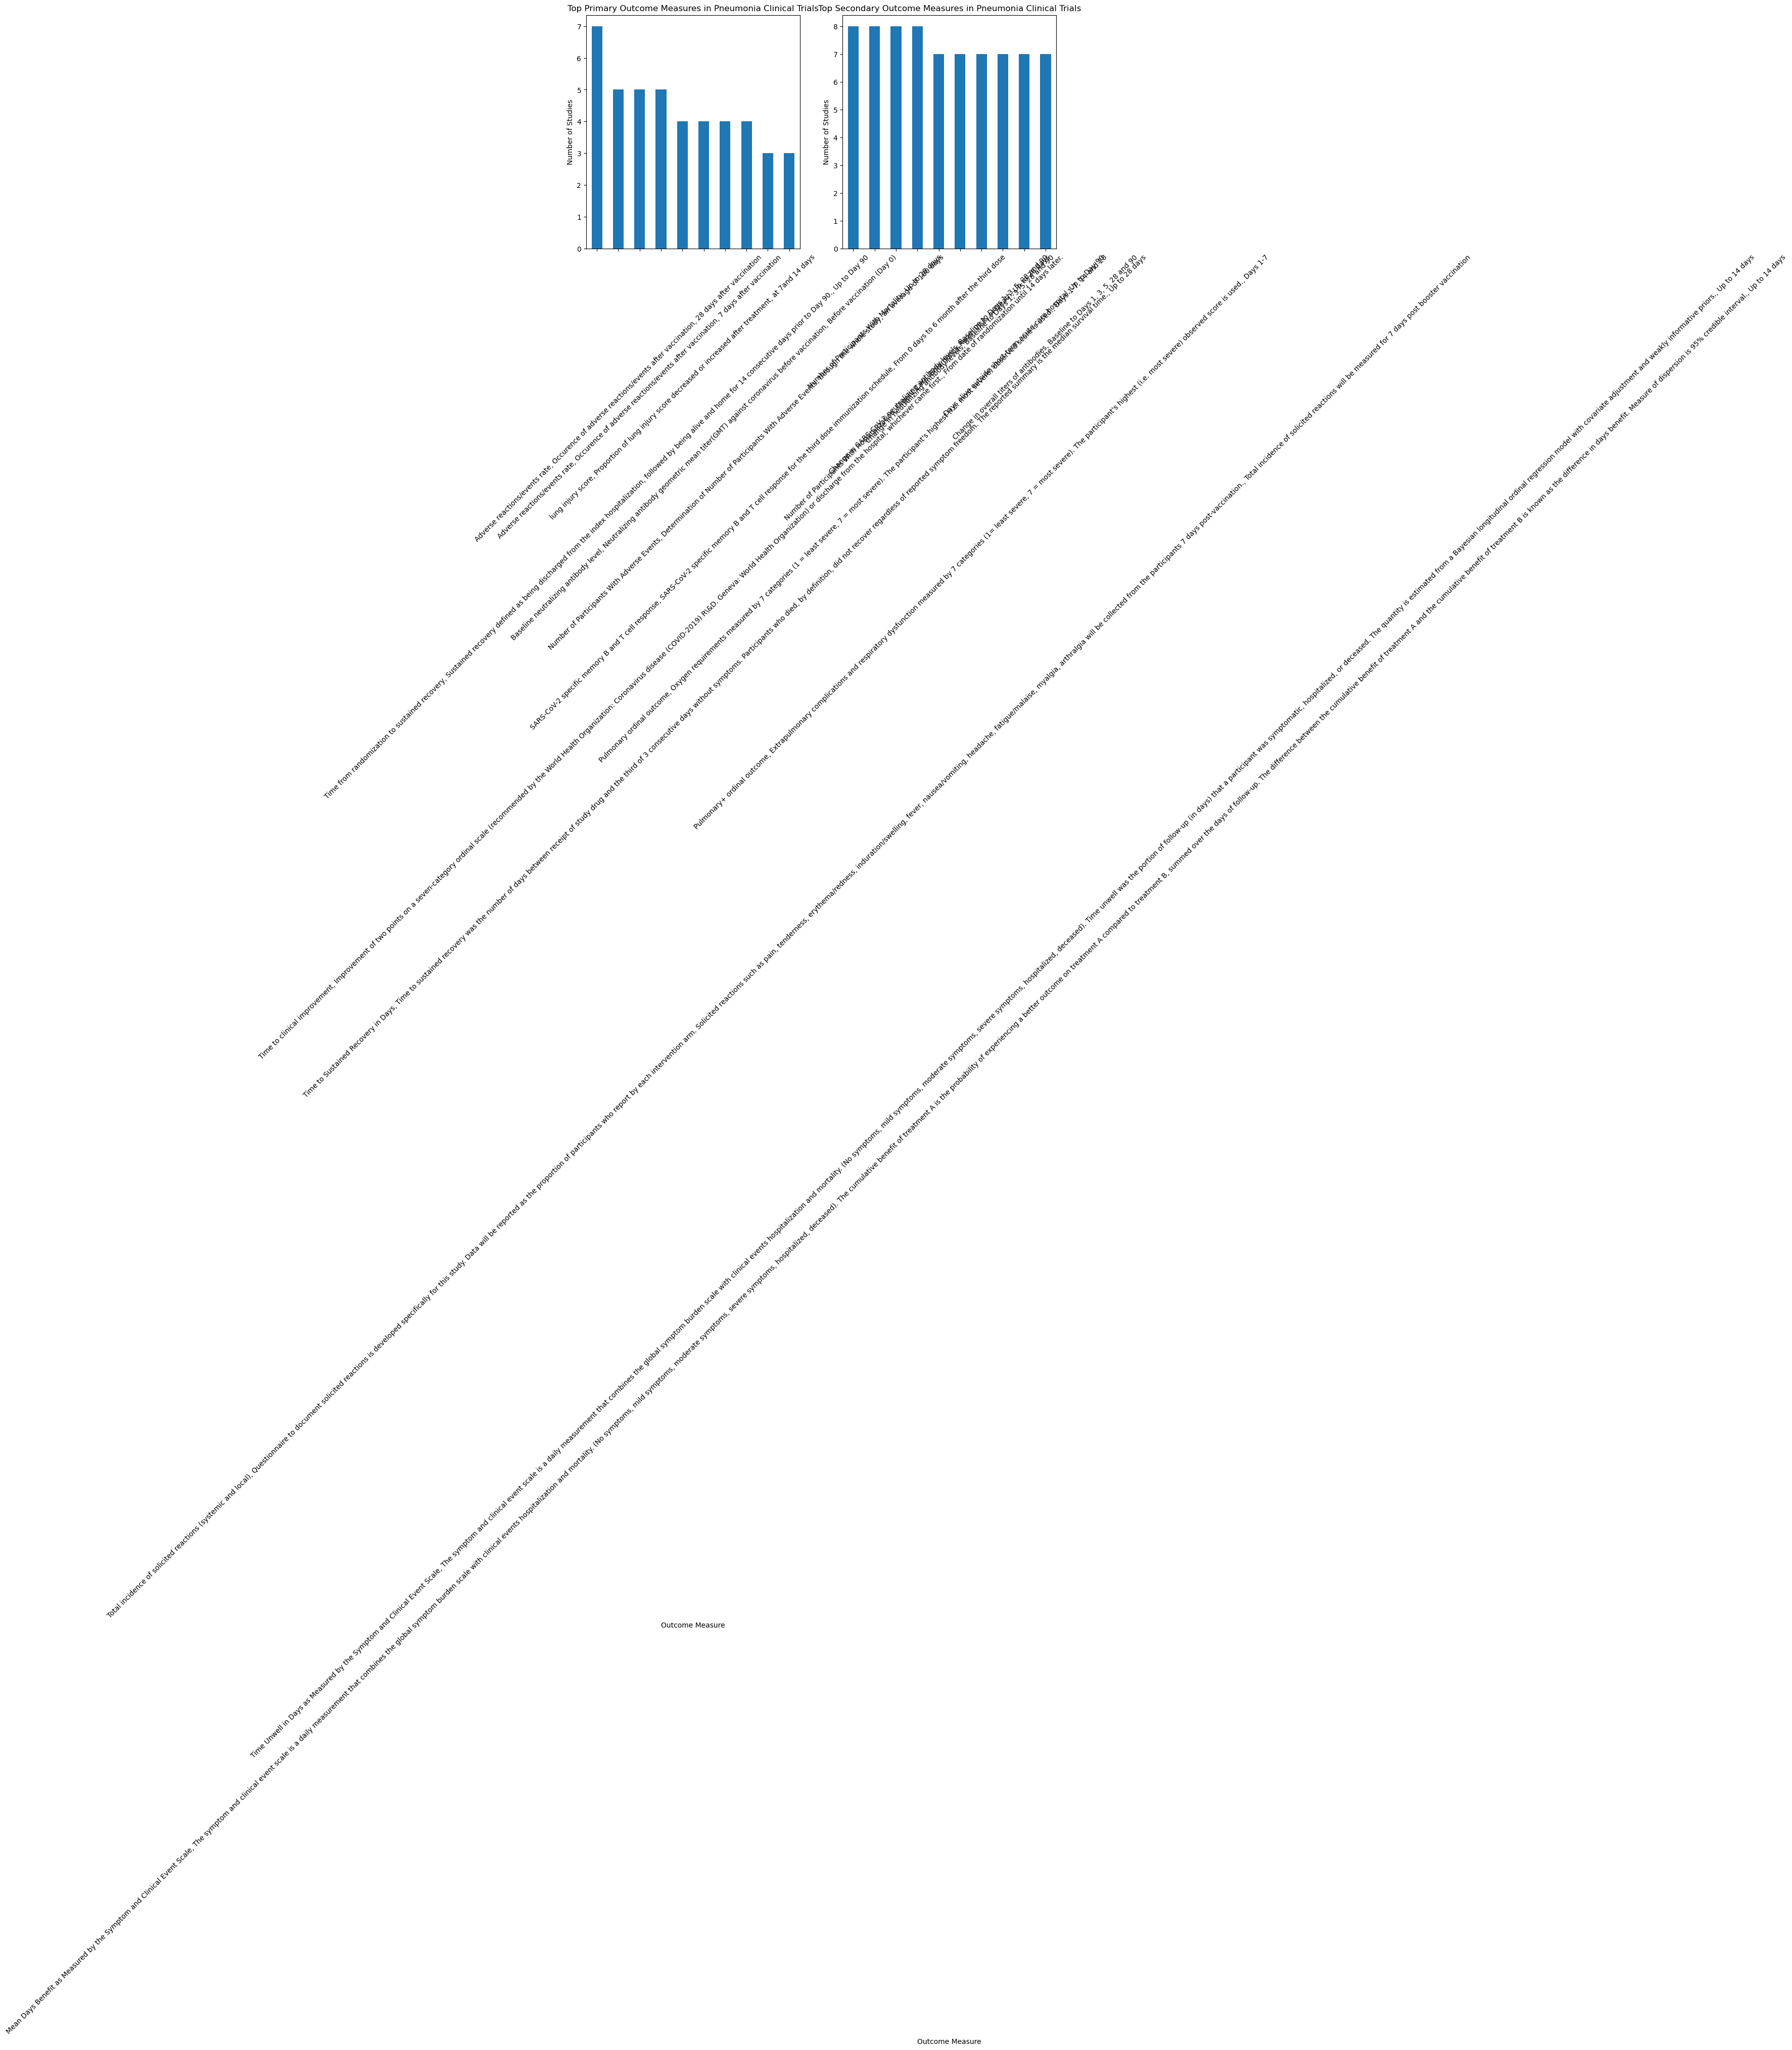

In [26]:
# Count the occurrences of primary and secondary outcome measures
pry_outcomes=df['Primary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)
sec_outcomes=df['Secondary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)
# Plot a bar chart for top outcome measures
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
pry_outcomes.plot(kind='bar')
plt.title('Top Primary Outcome Measures in Pneumonia Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sec_outcomes.plot(kind='bar')
plt.title('Top Secondary Outcome Measures in Pneumonia Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h2> Clinical Trial Locations </h2>

In [27]:
# Count the number of studies in each location
location_distribution=df['Locations'].str.split('|').explode().str.strip().value_counts().head(10)
print(location_distribution)

Massachusetts General Hospital, Boston, Massachusetts, 02114, United States                49
University of Minnesota, Minneapolis, Minnesota, 55455, United States                      38
National Institutes of Health Clinical Center, Bethesda, Maryland, 20892, United States    37
Duke University Medical Center, Durham, North Carolina, 27710, United States               34
Temple University Hospital, Philadelphia, Pennsylvania, 19140, United States               31
Brigham and Women's Hospital, Boston, Massachusetts, 02115, United States                  30
Mayo Clinic, Rochester, Minnesota, 55905, United States                                    27
Icahn School of Medicine at Mount Sinai, New York, New York, 10029, United States          26
Washington University School of Medicine, Saint Louis, Missouri, 63110, United States      26
Stanford University, Stanford, California, 94305, United States                            26
Name: Locations, dtype: int64
